In [2]:
import numpy as np
import pandas as pd

abalone_data = pd.read_csv('data/abalone.csv', header=None)
abalone_data.head(5)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:

datax = abalone_data.iloc[:, 1:]
datay = abalone_data.iloc[:, 0]

print(datax)
print(datay)

          1      2      3       4       5       6       7   8
0     0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...     ...    ...    ...     ...     ...     ...     ...  ..
4172  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 8 columns]
0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: 0, Length: 4177, dtype: object


In [7]:
np_abalone_data = np.array(abalone_data)

datax = np_abalone_data[:, 1:]
datay = np_abalone_data[:, 0]
print(datax)
print(datay)

[[0.455 0.365 0.095 ... 0.101 0.15 15]
 [0.35 0.265 0.09 ... 0.0485 0.07 7]
 [0.53 0.42 0.135 ... 0.1415 0.21 9]
 ...
 [0.6 0.475 0.205 ... 0.2875 0.308 9]
 [0.625 0.485 0.15 ... 0.261 0.296 10]
 [0.71 0.555 0.195 ... 0.3765 0.495 12]]
['M' 'M' 'F' ... 'M' 'F' 'M']


In [8]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3)
print(trnx.shape, tstx.shape, trny.shape, tsty.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trnx)
trnx_scale = scaler.transform(trnx)
tstx_scale = scaler.transform(tstx)

print(np.min(trnx_scale[:, 0]), np.max(trnx_scale[:, 0]))
print(np.min(tstx_scale[:, 0]), np.max(tstx_scale[:, 0]))

0.0 1.0
0.04827586206896553 1.0206896551724136


In [18]:
# bayesian
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(priors=[0.3, 0.4, 0.3])
gnb.fit(trnx, trny)
trny_hat = gnb.predict(trnx)
tsty_hat = gnb.predict(tstx)
print(trny_hat)
print(tsty_hat)

['I' 'F' 'I' ... 'I' 'I' 'I']
['I' 'F' 'I' ... 'M' 'I' 'F']


In [19]:
from sklearn import metrics
# confusion_matrix(tsty, tsty_hat)
print(metrics.accuracy_score(trny, trny_hat))
print(metrics.accuracy_score(tsty, tsty_hat))

0.5138556277796784
0.5191387559808612


In [22]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(trnx, trny)
knn_pred_trn = knn_model.predict(trnx)
knn_pred_tst = knn_model.predict(tstx)
print(knn_pred_trn)
print(knn_pred_tst)

['I' 'F' 'I' ... 'F' 'I' 'I']
['I' 'M' 'I' ... 'M' 'I' 'F']


In [23]:
print(metrics.accuracy_score(trny, knn_pred_trn))
print(metrics.accuracy_score(tsty, knn_pred_tst))

0.6825179609989737
0.5342902711323764


In [24]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=4, min_samples_split=3)
tree_model.fit(trnx, trny)
tree_pred = tree_model.predict(tstx)
tree_model.feature_importances_

array([0.01283171, 0.        , 0.01954212, 0.06839678, 0.05970682,
       0.685105  , 0.        , 0.15441757])

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot')

[Text(0.5089285714285714, 0.9, 'X[5] <= 0.131\ngini = 0.665\nsamples = 2923\nvalue = [906, 953, 1064]'),
 Text(0.2857142857142857, 0.7, 'X[7] <= 8.5\ngini = 0.497\nsamples = 1079\nvalue = [153, 721, 205]'),
 Text(0.14285714285714285, 0.5, 'X[5] <= 0.093\ngini = 0.342\nsamples = 758\nvalue = [59, 605, 94]'),
 Text(0.07142857142857142, 0.3, 'X[2] <= 0.152\ngini = 0.266\nsamples = 584\nvalue = [27, 496, 61]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.263\nsamples = 583\nvalue = [26, 496, 61]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.21428571428571427, 0.3, 'X[4] <= 0.156\ngini = 0.538\nsamples = 174\nvalue = [32, 109, 33]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.375\nsamples = 8\nvalue = [6, 0, 2]'),
 Text(0.25, 0.1, 'gini = 0.509\nsamples = 166\nvalue = [26, 109, 31]'),
 Text(0.42857142857142855, 0.5, 'X[2] <= 0.098\ngini = 0.664\nsamples = 321\nvalue = [94, 116, 111]'),
 Text(0.35714285714285715, 0.3, 'X[4] <= 0.144\ngini = 0.468\nsam

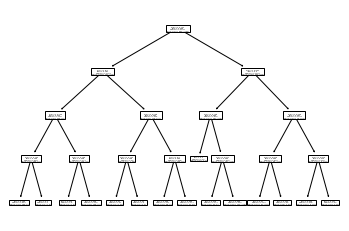

In [26]:
from sklearn import tree
tree.plot_tree(tree_model)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(tsty, tree_model.predict(tstx))

array([[124,  60, 217],
       [ 23, 303,  63],
       [ 98, 113, 253]], dtype=int64)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=15, n_estimators=100, random_state=0)
rf_model.fit(trnx, trny)

rf_pred = rf_model.predict(tstx)
print(metrics.accuracy_score(tsty, rf_pred))
confusion_matrix(tsty, rf_pred)

0.5518341307814992


array([[157,  38, 206],
       [ 32, 295,  62],
       [149,  75, 240]], dtype=int64)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(max_depth=3, n_estimators=30, random_state=0)
gbm_model.fit(trnx, trny)

gbm_pred = gbm_model.predict(tstx)
print(metrics.accuracy_score(tsty, gbm_pred))
confusion_matrix(tsty, gbm_pred)

0.5598086124401914


array([[110,  44, 247],
       [ 16, 304,  69],
       [ 90,  86, 288]], dtype=int64)